In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from feature import *

In [26]:
import env
reload(env)

<module 'env' from 'env.pyc'>

In [27]:
from env import *

In [4]:
%matplotlib inline

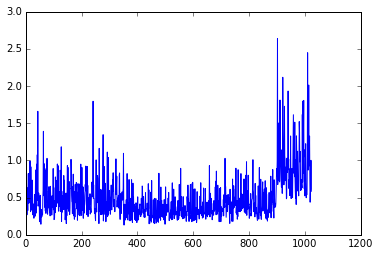

In [5]:
plt.plot(feats.mean(axis=0))

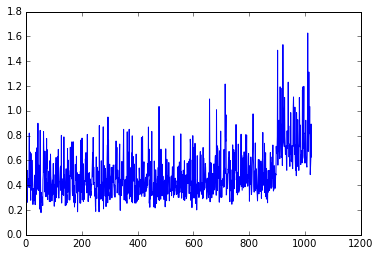

In [6]:
plt.plot(feats.std(axis=0))

In [47]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans(n_clusters=25, max_iter=100, random_state=14343)

In [48]:
%time D = model.fit_transform(feats)

CPU times: user 20.2 s, sys: 2.23 s, total: 22.4 s
Wall time: 15.9 s


In [122]:
pd.Series(C).value_counts()

10    63904
15    43939
24    37543
19    36297
12    35206
7     30414
23    28278
8     25884
11    25841
20    21555
18    20885
6     15402
13    15157
9     13475
5     13341
14    13293
17    12752
22     8086
4      6506
2      2702
1      1465
21       36
16       12
0        11
3        10
dtype: int64

In [53]:
C = model.predict(feats)

In [49]:
reps = [index_to_id(x) for x in D.argmin(axis=0)]

In [99]:
def show_photos_by_cluster(i, m=1, n=5, seed=0):
    rng = np.random.RandomState(seed)
    ids = np.where(C==i)[0]
    samples = rng.choice(ids, m*n, replace=True)
    samples = [index_to_id(x) for x in samples]
    return show_photos(samples, m, m)

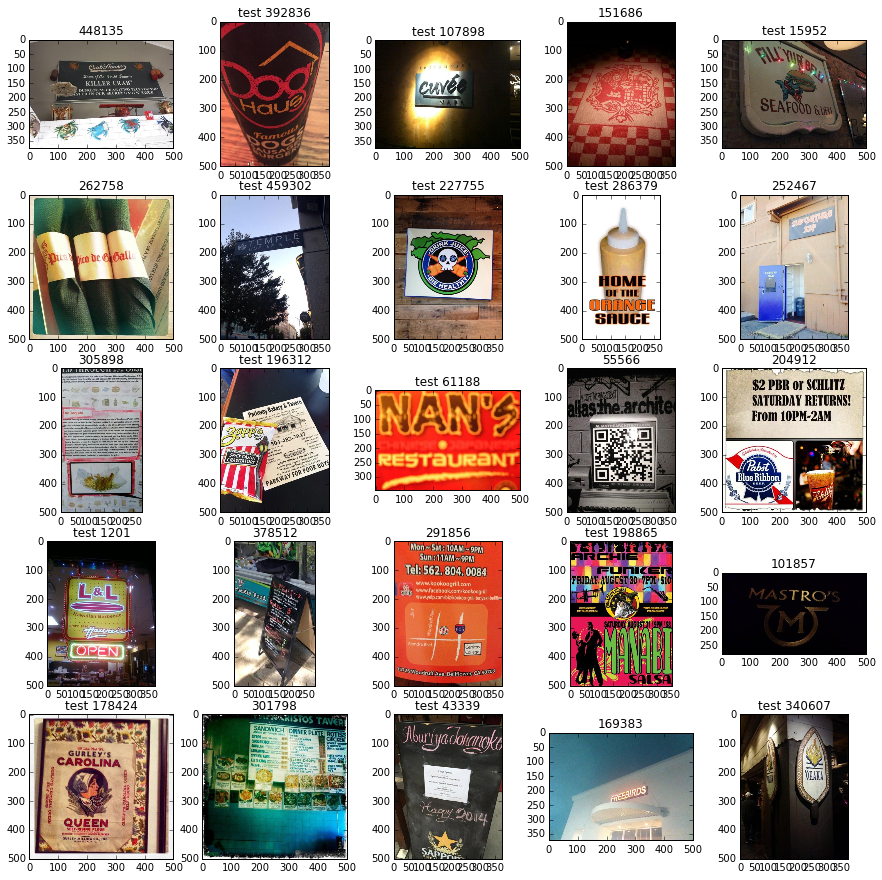

In [132]:
_ = show_photos_by_cluster(13,5,5)

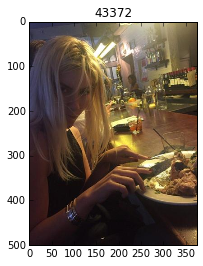

In [118]:
show_image(*index_to_id(18))

In [120]:
D[18].argsort()

array([14, 18, 12, 19,  9, 15, 11,  8, 23, 10, 24,  7, 20,  2,  1, 13, 22,
        5, 17,  0,  6,  4, 16, 21,  3])

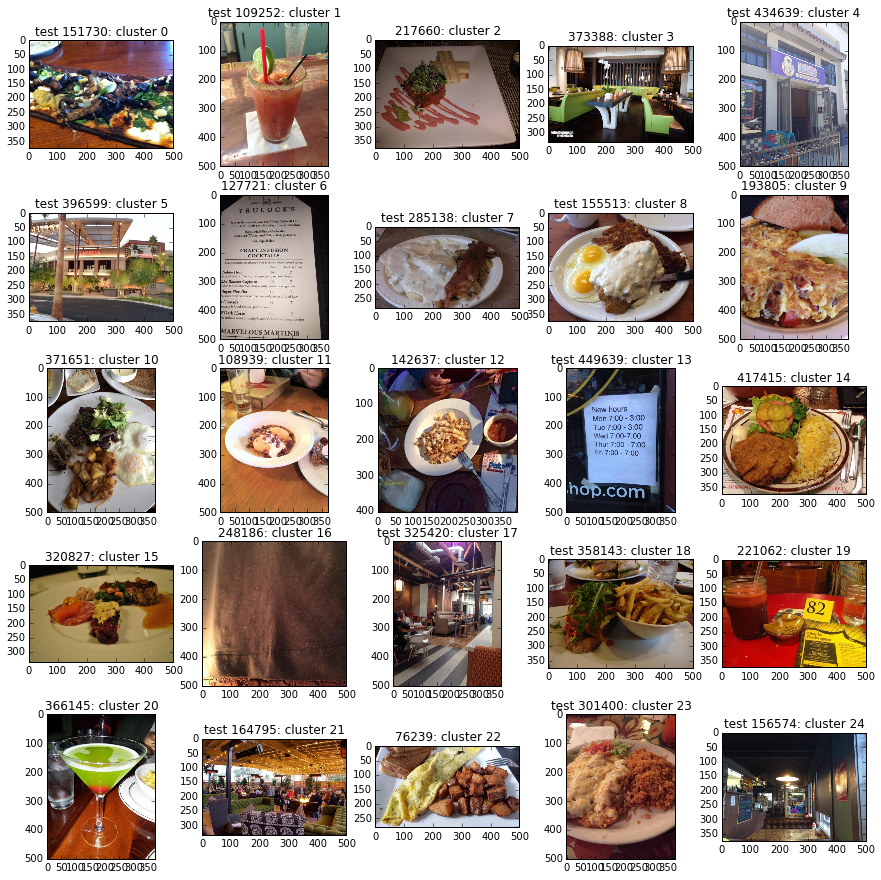

In [97]:
_ = show_photos(reps, 5, 5, msgs=['cluster '+str(i) for i in range(25)])